# Anchormen assignment
## Content
- Introduction
- Import the dataset
- Exploratory Data Analysis (EDA)
    - Describe the data
    - Dealing with missing values 
    - Dealing with Categorical Values
- Pearson Correlation
    - Heatmap of the Pearson Correlation
    
- Random forest RF
    - Ordinary Least Square (OLS)
    - Parameter Tuning: Hyperparameter Optimization
    - Build the model 
    - Performance evaluation
        - Accuracy Score
        - Cross validation mean score
        - Confusion Matrix
        - Feature importance
- Support Vector Machine (SVM)
    - Build the model 
    - Performance evaluation
        - Accuracy Score
        - Cross validation mean score
        - Confusion Matrix
- K-nearest neighbors (KNN)   
    - Build the model 
    - Performance evaluation
        - Accuracy Score
        - Cross validation mean score
        - Confusion Matrix  
- Summary
- Persepective
- References 

### Introduction
The goal of this study is to train multiple supervised machine learning models.
<br>
### Import the data set:

In [1]:
from scipy.io import arff
import pandas as pd

#Load the data first file 
data = arff.loadarff('/Users/tarek.benguiza/Desktop/Assignment-DS/BreastCancerAll.missing.arff')
df_all = pd.DataFrame(data[0])

#Load the data second file
data = arff.loadarff('/Users/tarek.benguiza/Desktop/Assignment-DS/BreastCancerAll.reduced.using.cfs.missing.arff')
df = pd.DataFrame(data[0])

### Exploratory Data Analysis (EDA)
Exploratory data analyssis is to perform initial investigations on the data to discover patterns and to spot anomalies

In [2]:
df_all.head()

,1_chrom1_reg2927-43870_probloss,2_chrom1_reg2927-43870_probnorm,3_chrom1_reg2927-43870_probgain,4_chrom1_reg2927-43870_call,5_chrom1_reg85022-216735_probloss,6_chrom1_reg85022-216735_probnorm,7_chrom1_reg85022-216735_probgain,8_chrom1_reg85022-216735_call,9_chrom1_reg359527-372295_probloss,10_chrom1_reg359527-372295_probnorm,...,12172_chrom23_reg152552851-152935130_call,12173_chrom23_reg152994680-153054487_probloss,12174_chrom23_reg152994680-153054487_probnorm,12175_chrom23_reg152994680-153054487_probgain,12176_chrom23_reg152994680-153054487_call,12177_chrom23_reg153997146-154492924_probloss,12178_chrom23_reg153997146-154492924_probnorm,12179_chrom23_reg153997146-154492924_probgain,12180_chrom23_reg153997146-154492924_call,class
0,0.008,0.977,0.015,b'0',0.008,0.977,0.015,b'0',0.008,0.977,...,b'1',0.0,0.000,0.342,b'2',0.0,0.000,0.948,b'1',b'HR+'
1,0.000,0.000,0.912,b'1',0.000,0.000,0.912,b'1',0.032,0.964,...,b'1',0.0,0.016,0.939,b'1',0.0,0.016,0.939,b'1',b'HR+'
2,0.005,0.968,0.027,b'0',0.005,0.968,0.027,b'0',0.005,0.968,...,b'1',0.0,0.000,0.858,b'1',0.0,0.000,0.858,b'1',b'HR+'
3,0.942,0.058,0.000,b'-1',0.942,0.058,0.000,b'-1',0.942,0.058,...,b'1',0.0,0.000,0.872,b'1',0.0,0.000,0.872,b'1',b'HER2+'
4,0.000,0.002,0.994,b'1',0.000,0.002,0.994,b'1',0.000,0.002,...,b'1',0.0,0.000,0.870,b'1',0.0,0.000,0.870,b'1',b'TN'


In [3]:
print("(Columns , rows)", df_all.shape)

(Columns , rows) (157, 12181)


First 5 rows to see how our data set looks like

In [4]:
df_all.describe()

,1_chrom1_reg2927-43870_probloss,2_chrom1_reg2927-43870_probnorm,3_chrom1_reg2927-43870_probgain,5_chrom1_reg85022-216735_probloss,6_chrom1_reg85022-216735_probnorm,7_chrom1_reg85022-216735_probgain,9_chrom1_reg359527-372295_probloss,10_chrom1_reg359527-372295_probnorm,11_chrom1_reg359527-372295_probgain,13_chrom1_reg471671-689581_probloss,...,12167_chrom23_reg91686760-92103804_probgain,12169_chrom23_reg152552851-152935130_probloss,12170_chrom23_reg152552851-152935130_probnorm,12171_chrom23_reg152552851-152935130_probgain,12173_chrom23_reg152994680-153054487_probloss,12174_chrom23_reg152994680-153054487_probnorm,12175_chrom23_reg152994680-153054487_probgain,12177_chrom23_reg153997146-154492924_probloss,12178_chrom23_reg153997146-154492924_probnorm,12179_chrom23_reg153997146-154492924_probgain
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,...,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,0.127414,0.717013,0.154102,0.147057,0.732535,0.119108,0.163707,0.734586,0.100866,0.147815,...,0.740892,0.003484,0.017185,0.714255,0.003484,0.017185,0.660280,0.003854,0.023089,0.699592
std,0.275607,0.365886,0.308506,0.295120,0.365589,0.282537,0.311667,0.367921,0.264880,0.298081,...,0.334137,0.042616,0.095575,0.309261,0.042616,0.095575,0.348368,0.042836,0.116746,0.314225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004000,0.407000,0.005000,0.006000,0.523000,0.004000,0.006000,0.451000,0.003000,0.005000,...,0.678000,0.000000,0.000000,0.680000,0.000000,0.000000,0.348000,0.000000,0.000000,0.649000
50%,0.010000,0.952000,0.013000,0.010000,0.959000,0.012000,0.010000,0.964000,0.011000,0.010000,...,0.932000,0.000000,0.000000,0.858000,0.000000,0.000000,0.840000,0.000000,0.000000,0.854000
75%,0.032000,0.977000,0.045000,0.057000,0.977000,0.029000,0.078000,0.977000,0.023000,0.057000,...,0.951000,0.000000,0.000000,0.927000,0.000000,0.000000,0.917000,0.000000,0.000000,0.916000
max,0.998000,0.979000,0.994000,0.998000,0.979000,0.994000,0.999000,0.979000,0.994000,0.999000,...,0.956000,0.534000,0.691000,0.956000,0.534000,0.691000,0.956000,0.534000,0.855000,0.956000


We can take a look at how spread out the values are. <br> Example: <b> 2_chrom1_reg2927-43870_probnorm </b> has a standard deviation of 0.36 and mean  is 0.71 wich indicates a big variation of a set of data values.

Text(0.5, 1.0, 'Class variables distribution')

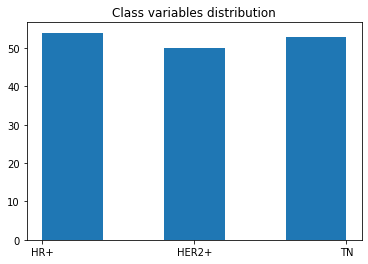

In [6]:
import matplotlib.pyplot as plt

plt.hist(df_all['class'].dropna(), bins=5)
plt.title('Class variables distribution')

As shown in the histogram above there are three types of breast cancer evenly distributed over the dataset.
<br> But our dataset has way too many features it wil make it complicated to understand we are going to use the reducedd one instead of the full data set.

### Dealing with missing values

In [7]:
df.isnull().sum()

302_chrom1_reg44816452-46047207_probnorm        0
1195_chrom2_reg15573647-20346474_probgain       0
1441_chrom2_reg126478953-126745976_probloss     0
1471_chrom2_reg131945577-132042781_probgain     0
1673_chrom3_reg12735694-14873985_probloss       0
1966_chrom3_reg128485208-128664764_probnorm     0
1975_chrom3_reg130189196-130206126_probgain     0
2007_chrom3_reg143686906-144718154_probgain     0
2019_chrom3_reg156981865-159692979_probgain     0
2054_chrom3_reg166639991-168786545_probnorm     0
2139_chrom3_reg196908262-196937230_probgain     0
2170_chrom4_reg833085-843614_probnorm           1
2630_chrom4_reg187735989-188875290_probnorm     1
3150_chrom6_reg1292057-1353261_probnorm         0
3211_chrom6_reg18550170-18661357_probgain       0
3401_chrom6_reg62843325-63283741_probloss       0
3435_chrom6_reg69133049-69809498_probgain       0
3593_chrom6_reg110630205-111025278_probloss     0
3659_chrom6_reg128962975-130409779_probgain     0
4322_chrom8_reg184617-320897_probnorm           0


In [8]:
df['2170_chrom4_reg833085-843614_probnorm'].fillna(0, inplace=True)
df['2630_chrom4_reg187735989-188875290_probnorm'].fillna(0, inplace=True)

Only those two columns have nan values we can replace them with 0.

In [9]:
df.dtypes

302_chrom1_reg44816452-46047207_probnorm        float64
1195_chrom2_reg15573647-20346474_probgain       float64
1441_chrom2_reg126478953-126745976_probloss     float64
1471_chrom2_reg131945577-132042781_probgain     float64
1673_chrom3_reg12735694-14873985_probloss       float64
1966_chrom3_reg128485208-128664764_probnorm     float64
1975_chrom3_reg130189196-130206126_probgain     float64
2007_chrom3_reg143686906-144718154_probgain     float64
2019_chrom3_reg156981865-159692979_probgain     float64
2054_chrom3_reg166639991-168786545_probnorm     float64
2139_chrom3_reg196908262-196937230_probgain     float64
2170_chrom4_reg833085-843614_probnorm           float64
2630_chrom4_reg187735989-188875290_probnorm     float64
3150_chrom6_reg1292057-1353261_probnorm         float64
3211_chrom6_reg18550170-18661357_probgain       float64
3401_chrom6_reg62843325-63283741_probloss       float64
3435_chrom6_reg69133049-69809498_probgain       float64
3593_chrom6_reg110630205-111025278_probloss     

Convert class column to string and encode it int

In [10]:
def diagnosis_value(diagnosis): 
    if diagnosis.decode("utf-8")  == 'TN': 
        return 0
    if diagnosis.decode("utf-8")  == 'HER2+': 
        return 1
    if diagnosis.decode("utf-8")  == 'HR+':
        return 2
    
df['class'] = df['class'].apply(diagnosis_value)

Take one last look at the dataframe.

In [11]:
df.head()

,302_chrom1_reg44816452-46047207_probnorm,1195_chrom2_reg15573647-20346474_probgain,1441_chrom2_reg126478953-126745976_probloss,1471_chrom2_reg131945577-132042781_probgain,1673_chrom3_reg12735694-14873985_probloss,1966_chrom3_reg128485208-128664764_probnorm,1975_chrom3_reg130189196-130206126_probgain,2007_chrom3_reg143686906-144718154_probgain,2019_chrom3_reg156981865-159692979_probgain,2054_chrom3_reg166639991-168786545_probnorm,...,9605_chrom17_reg35344057-35385941_probloss,9725_chrom17_reg41458670-41494331_probloss,9945_chrom17_reg49218134-49331755_probloss,10674_chrom18_reg64796820-68375250_probnorm,11613_chrom21_reg13660680-14258259_probloss,11969_chrom22_reg41221190-41290227_probloss,11987_chrom22_reg42652021-43322780_probgain,12034_chrom23_reg384298-385792_probnorm,12038_chrom23_reg422315-462468_probnorm,class
0,0.979,0.005,0.009,0.006,0.008,0.975,0.016,0.016,0.016,0.976,...,0.022,0.022,0.022,0.960,0.000,0.824,0.000,0.765,0.765,2
1,0.979,0.006,1.000,0.000,0.009,0.000,0.971,0.943,0.943,0.000,...,0.000,0.026,0.016,0.000,0.000,0.991,0.000,0.012,0.012,2
2,0.978,0.006,0.007,0.007,0.007,0.985,0.007,0.007,0.007,0.985,...,0.023,0.016,0.016,0.947,0.001,0.999,0.000,0.838,0.838,2
3,0.000,0.651,0.069,0.001,1.000,0.000,0.071,0.000,0.025,0.969,...,0.000,1.000,0.903,0.973,0.043,0.093,0.004,0.134,0.134,1
4,0.978,0.009,0.017,0.003,1.000,0.968,0.026,0.984,0.984,0.973,...,1.000,0.025,0.025,0.000,0.011,0.004,0.131,0.001,0.001,0


---
### Pearson Correlation:
The Pearson product-moment correlation coefficient is a measure of the strength of the linear relationship between two variables. <br>
 

In [12]:
#We have to many features to make this study more understandable we are only going to take a look at the first 11 columns
df_chunk = df[df.columns[0:11]]
Pearson_corr= df_chunk.corr()
Pearson_corr

,302_chrom1_reg44816452-46047207_probnorm,1195_chrom2_reg15573647-20346474_probgain,1441_chrom2_reg126478953-126745976_probloss,1471_chrom2_reg131945577-132042781_probgain,1673_chrom3_reg12735694-14873985_probloss,1966_chrom3_reg128485208-128664764_probnorm,1975_chrom3_reg130189196-130206126_probgain,2007_chrom3_reg143686906-144718154_probgain,2019_chrom3_reg156981865-159692979_probgain,2054_chrom3_reg166639991-168786545_probnorm,2139_chrom3_reg196908262-196937230_probgain
302_chrom1_reg44816452-46047207_probnorm,1.000000,-0.297167,0.030011,-0.236906,-0.169611,0.270913,-0.189938,-0.222666,-0.213681,0.203596,-0.181235
1195_chrom2_reg15573647-20346474_probgain,-0.297167,1.000000,-0.178236,0.498212,0.112025,-0.298016,0.342321,0.337192,0.328297,-0.252965,0.100389
1441_chrom2_reg126478953-126745976_probloss,0.030011,-0.178236,1.000000,-0.143222,0.011400,0.164987,-0.133381,-0.116996,-0.079725,0.103684,0.039472
1471_chrom2_reg131945577-132042781_probgain,-0.236906,0.498212,-0.143222,1.000000,-0.032566,-0.361270,0.364430,0.457718,0.418581,-0.404827,0.220523
1673_chrom3_reg12735694-14873985_probloss,-0.169611,0.112025,0.011400,-0.032566,1.000000,-0.095284,0.037592,0.005038,0.090642,-0.132328,0.012045
1966_chrom3_reg128485208-128664764_probnorm,0.270913,-0.298016,0.164987,-0.361270,-0.095284,1.000000,-0.746619,-0.741344,-0.584999,0.759170,-0.302787
1975_chrom3_reg130189196-130206126_probgain,-0.189938,0.342321,-0.133381,0.364430,0.037592,-0.746619,1.000000,0.849802,0.714387,-0.674968,0.355708
2007_chrom3_reg143686906-144718154_probgain,-0.222666,0.337192,-0.116996,0.457718,0.005038,-0.741344,0.849802,1.000000,0.830107,-0.709500,0.436515
2019_chrom3_reg156981865-159692979_probgain,-0.213681,0.328297,-0.079725,0.418581,0.090642,-0.584999,0.714387,0.830107,1.000000,-0.729796,0.511254
2054_chrom3_reg166639991-168786545_probnorm,0.203596,-0.252965,0.103684,-0.404827,-0.132328,0.759170,-0.674968,-0.709500,-0.729796,1.000000,-0.415190


Example we can notice that <b> 1975_chrom3_reg130189196-130206126_probgain </b> and <b> 2007_chrom3_reg143686906-144718154_probgain </b> are highly corrolated with: 0.849802

### Heatmap of the Pearson Correlation 

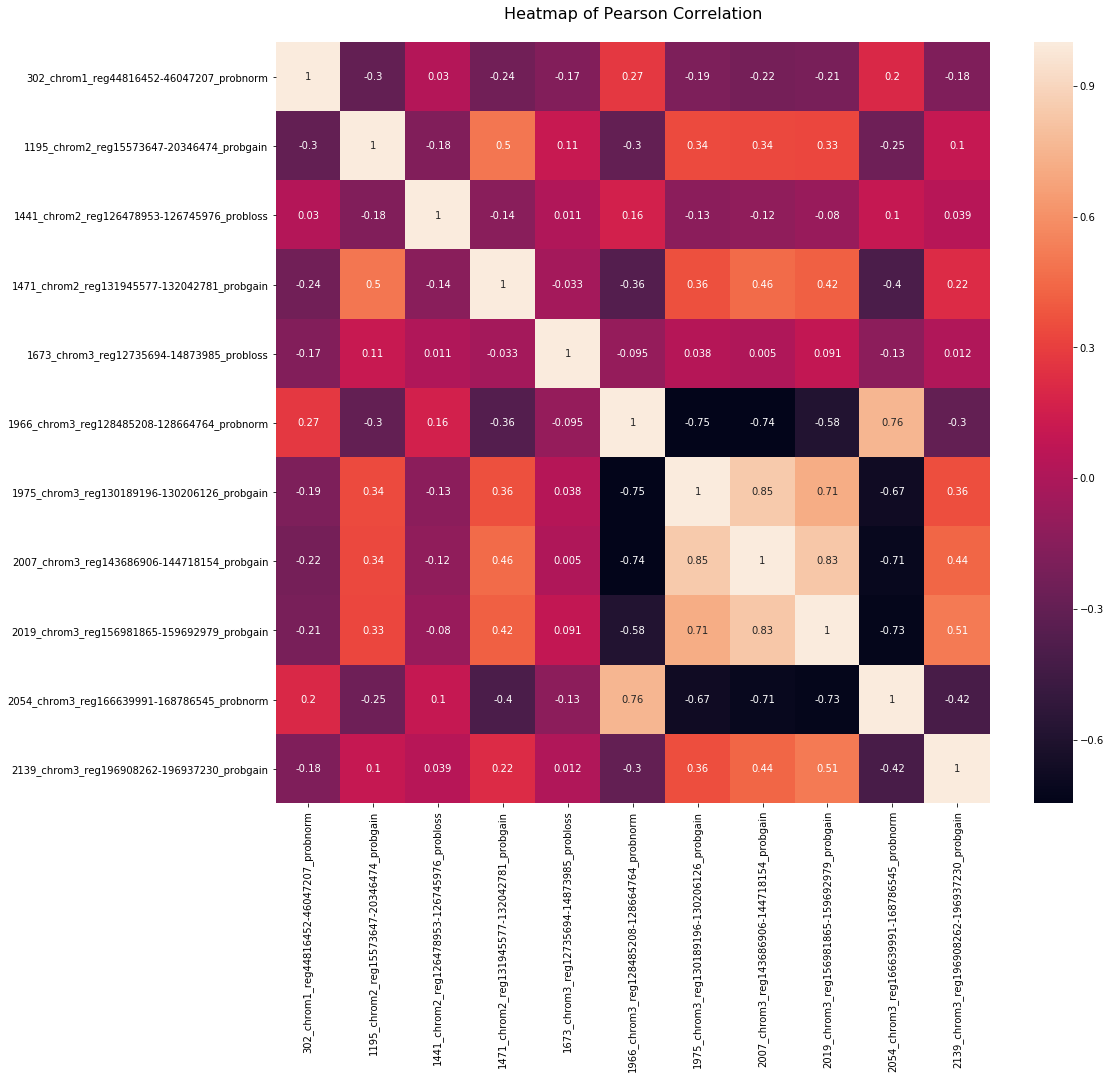

In [13]:
import seaborn as sns

# checking the correlation between each of the variables
plt.figure(figsize=(16,14))
ax = plt.axes()
sns.heatmap(Pearson_corr, annot=True)
ax.set_title('Heatmap of Pearson Correlation\n', fontsize=16)
plt.axis('tight')
plt.show()

More varaibles can be seen in the heat map.

## Random forest (RF)

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

#### Ordinary Least Square (OLS)
The goal of OLS is to closely fit a function with the data. It does so by minimizing the sum of squared errors from the data.

In [14]:
import statsmodels.api as sm

#predictor 
y = df['class'].to_numpy()
del df['class']

#features
X = df.to_numpy()

X1 = sm.add_constant(X)
ols_results = sm.OLS(y, X1).fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     3.603
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.10e-08
Time:                        12:31:43   Log-Likelihood:                -101.57
No. Observations:                 157   AIC:                             323.1
Df Residuals:                      97   BIC:                             506.5
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3452      0.504      0.685      0.495      -0.656       1.346
x1             0.0629      0.161      0.390      0.697      -0.257       0.383
x2             0.3181      0.262      1.214      0.228      -0.202       0.838
x3             0.1746      0.218      0.801      0.425      -0.258       0.607
x4             0.3090      0.273      1.132      0.261      -0.233       0.851
x5            -0.2672      0.205     -1.304      0.195      -0.674       0.139
x6            -0.0834      0.261     -0.319      0.750      -0.602       0.435
x7             0.2442      0.293      0.833      0.407      -0.338       0.826
x8            -0.5353      0.388     -1.379      0.171      -1.306       0.235
x9             0.3684      0.301      1.223      0.224      -0.229       0.966
x10            0.2851      0.253      1.126      0.263      -0.217       0.787
x11           -0.0642      0.162     -0.397      0.692      -0.386       0.257
x12            0.0030      0.170      0.018      0.986      -0.334       0.340
x13           -0.0317      0.171     -0.185      0.853      -0.371       0.308
x14            0.1685      0.168      1.003      0.318      -0.165       0.502
x15            0.0429      0.212      0.202      0.840      -0.378       0.463
x16            0.1618      0.215      0.753      0.453      -0.265       0.588
x17           -0.2025      0.236     -0.857      0.393      -0.671       0.266
x18            0.1175      0.164      0.715      0.476      -0.209       0.444
x19           -0.3733      0.215     -1.736      0.086      -0.800       0.054
x20            0.0301      0.200      0.150      0.881      -0.367       0.427
x21           -0.2008      0.203     -0.991      0.324      -0.603       0.201
x22           -0.1531      0.202     -0.758      0.450      -0.554       0.248
x23           -0.0447      0.184     -0.243      0.809      -0.410       0.321
x24            0.2468      0.207      1.194      0.235      -0.163       0.657
x25            0.0459      0.241      0.191      0.849      -0.432       0.524
x26            0.2119      0.209      1.013      0.313      -0.203       0.627
x27            0.2720      0.196      1.385      0.169      -0.118       0.662
x28           -0.0990      0.473     -0.209      0.835      -1.038       0.840
x29            0.0421      0.518      0.081      0.935      -0.986       1.070
x30           -0.4580      0.385     -1.188      0.238      -1.223       0.307
x31            0.0254      0.166      0.153      0.879      -0.304       0.355
x32           -0.2911      0.277     -1.052      0.296      -0.840       0.258
x33           -0.0842      0.485     -0.173      0.863      -1.047       0.879
x34           -0.3351      0.418     -0.801      0.425      -1.165       0.495
x35            0.4119      0.191      2.160      0.033       0.033       0.790
x3

R-squared value is 0.687 and the adjusted r-squared is 0.49.

### Parameter Tuning: Hyperparameter Optimization 

Machine learning models takes hyperparameters, we are going to first define a range of values.
Now the grid search technique will construct many versions for each parameter which makes grid search computationally very expensive.

<b> GridSearchCV </b> <br>
Now, we will use the Grid-search method to find the best of a family of models, parametrized by a grid of parameter. We will use the 10 fold cross validation.
<br><br>
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen in this case we will set K = 10.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# define in the parameter values that should be search
# create a parameter grid:  map the parameter names to the value that should be search

param_grid = {
    'n_estimators': [ 25, 100, 500, 1000],
    'max_depth': [ 5, 8, 15, 25, 30, None],
    'max_features': ['auto', 'sqrt', 'log2', None] 
     }

#use out-of-bag samples ("oob_score= True") to estimate the generalization accuracy.
rfc = RandomForestClassifier(bootstrap= True, n_jobs= 1, oob_score= True)

#let's use cv=10 in the GridSearchCV call
#performance estimation
#initiate the grid 
grid = GridSearchCV(rfc, param_grid = param_grid, cv=10, scoring ='accuracy', iid=False)

regr_pipe = Pipeline([('regr_cv', grid)])

#fit your data before you can get the best parameter combination.
grid.fit(X,y)
grid.cv_results_

{'mean_fit_time': array([0.03238013, 0.12222755, 0.62230415, 1.17414432, 0.02932076,
        0.11402652, 0.57200987, 1.13898101, 0.02752535, 0.11140907,
        0.5546443 , 1.10425074, 0.04455178, 0.17292013, 0.87738907,
        1.74065974, 0.02932944, 0.11116486, 0.56213369, 1.12982998,
        0.0300051 , 0.11240795, 0.56799009, 1.12276382, 0.02771122,
        0.11064172, 0.54270446, 1.09086547, 0.04350069, 0.1765343 ,
        0.8695967 , 1.8102155 , 0.03032732, 0.11715889, 0.57788641,
        1.11953435, 0.02906072, 0.11073866, 0.56331987, 1.11514235,
        0.02791569, 0.10729575, 0.5484427 , 1.0847666 , 0.04414146,
        0.17171669, 0.86273854, 1.7334692 , 0.02815964, 0.10987775,
        0.55131974, 1.10191665, 0.02827241, 0.11077666, 0.55437505,
        1.12170706, 0.02668128, 0.10888951, 0.53885691, 1.08341913,
        0.04332874, 0.17254877, 0.86184261, 1.72483201, 0.02723098,
        0.11148925, 0.5579164 , 1.10399835, 0.02755299, 0.10926924,
        0.5536145 , 1.11500328,

Best Model
Best score, parameter, and estimator

In [23]:
# Let's find out the best scores, parameter and the estimator from the gridsearchCV
print("GridSearhCV best model:\n ")
print('The best score: ', grid.best_score_)
print('The best parameter:', grid.best_params_)
print('The best model estimator:', grid.best_estimator_)


GridSearhCV best model:
 
The best score:  0.8666911764705884
The best parameter: {'max_depth': 30, 'max_features': 'log2', 'n_estimators': 100}
The best model estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)


Best score, parameter, and estimator

### Build the model

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 
#Define RandomForestClassifier and apply rfc with optimal parameters
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

Perfermance check 


Performance Accuracy on the Testing data: 81.0
Total Predictions 32
              precision    recall  f1-score   support

         TN+       0.88      0.64      0.74        11
       HER2+       1.00      0.80      0.89         5
         HR+       0.75      0.94      0.83        16

    accuracy                           0.81        32
   macro avg       0.88      0.79      0.82        32
weighted avg       0.83      0.81      0.81        32

10 k-fold cross validation mean score:  82.16949716949718
10 k-fold cross validation standard deviation score:  0.09472532207766207
Cross Validation Confidence Interval Accuracy: 0.82 (+/- 0.19)

Classification accuracy:  81.0


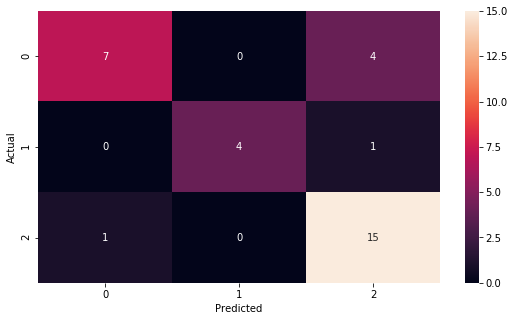

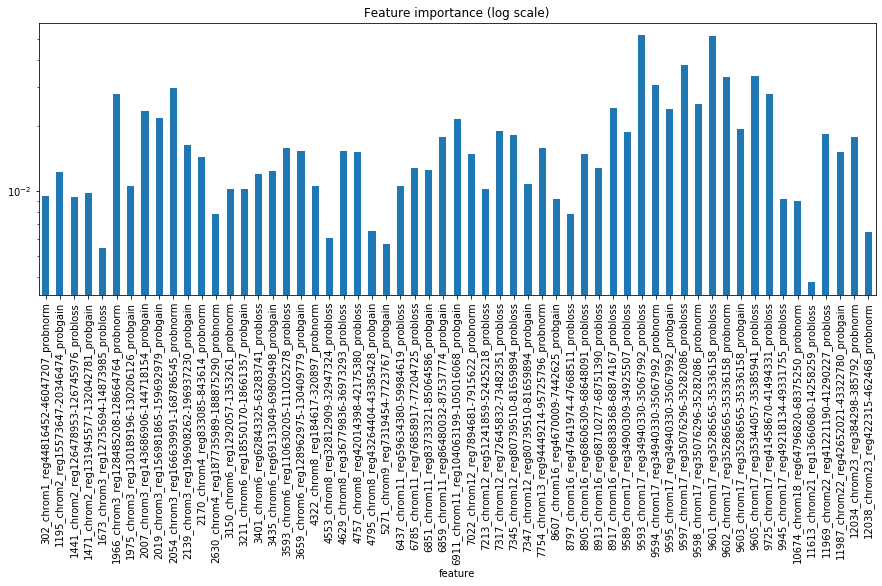

In [25]:
from sklearn.model_selection import (cross_val_score, StratifiedKFold)
from sklearn.metrics import (accuracy_score, confusion_matrix)
from sklearn.metrics import classification_report

cv_scores = []

scores = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy')
cv_scores.append(scores.mean())
cv_scores.append(scores.std())



print("Performance Accuracy on the Testing data:", round(rfc.score(X_test, y_test) *100))
#getting the predictions for X
y_pred = rfc.predict(X_test)
print('Total Predictions {}'.format(len(y_pred)))

# The classification Report
target_names = ['TN+', 'HER2+' , 'HR+']
print(classification_report(y_test, y_pred, target_names=target_names))

#cross validation mean score
print("10 k-fold cross validation mean score: ", scores.mean() *100)

#cross validation standard deviation score
print("10 k-fold cross validation standard deviation score: ", scores.std()) # *100)

# Cross Validation Confidence
print("Cross Validation Confidence Interval Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

# Classification accuracy score rounded
print("Classification accuracy: ", round(accuracy_score(y_test, y_pred, normalize=True) * 100))

# Making the Confusion Matrix
plt.figure(figsize=(9,5))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.axis('tight')
plt.show()

#Bar plot to see features importance 
feature_importance = pd.DataFrame.from_dict({'feature':df.columns, 'importance':regr_pipe.named_steps['regr_cv'].best_estimator_.feature_importances_})
feature_importance.plot.bar('feature', 'importance', figsize=(15,5), logy=True, title='Feature importance (log scale)', legend=False)
plt.show()

<b> Confusion matrix <b>

## Support Vector Machine (SVM)

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

-- SVM classificaition report: 
              precision    recall  f1-score   support

         TN+       0.75      0.82      0.78        11
       HER2+       1.00      0.80      0.89         5
         HR+       0.81      0.81      0.81        16

    accuracy                           0.81        32
   macro avg       0.85      0.81      0.83        32
weighted avg       0.82      0.81      0.81        32

Performance Accuracy on the Testing data: 81.0
Total Predictions 32
10 k-fold cross validation mean score:  73.984348984349
10 k-fold cross validation standard deviation score:  0.12070639689077761
Cross Validation Confidence Interval Accuracy: 0.74 (+/- 0.24)

Classification accuracy:  81.0


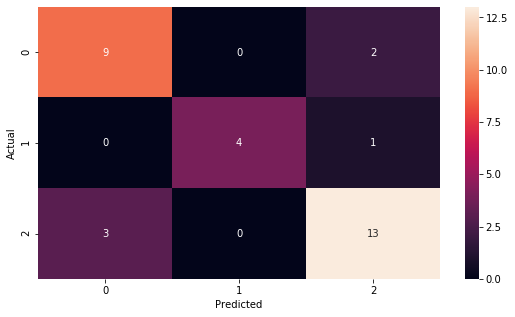

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 

#Support Vector Machine
svm_c=SVC(gamma='auto',kernel='linear')
svm_c.fit(X_train,y_train)
y_pred=svm_c.predict(X_test)

print('-- SVM classificaition report: ')
target_names = ['TN+', 'HER2+' , 'HR+']
print(classification_report(y_test, y_pred, target_names=target_names))

scores = cross_val_score(svm_c, X_train, y_train, cv=10, scoring='accuracy')

print("Performance Accuracy on the Testing data:", round(svm_c.score(X_test, y_test) *100))

#getting the predictions for X
y_pred = svm_c.predict(X_test)
print('Total Predictions {}'.format(len(y_pred)))

#cross validation mean score
print("10 k-fold cross validation mean score: ", scores.mean() *100)

#cross validation standard deviation score
# amount of variation or dispersion of a set of data values
print("10 k-fold cross validation standard deviation score: ", scores.std()) # *100)

# The mean score and the 95% confidence interval of the score estimates are hence given by
print("Cross Validation Confidence Interval Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

# printing classification accuracy score rounded
print("Classification accuracy: ", round(accuracy_score(y_test, y_pred, normalize=True) * 100))

# Making the Confusion Matrix
plt.figure(figsize=(9,5))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.axis('tight')
plt.show()


-- KNeighborsClassifier report: 
              precision    recall  f1-score   support

         TN+       0.80      0.36      0.50        11
       HER2+       0.57      0.80      0.67         5
         HR+       0.70      0.88      0.78        16

    accuracy                           0.69        32
   macro avg       0.69      0.68      0.65        32
weighted avg       0.71      0.69      0.66        32

Performance Accuracy on the Testing data: 69.0
Total Predictions 32
10 k-fold cross validation mean score:  73.65967365967367
10 k-fold cross validation standard deviation score:  0.12317972755546218
Cross Validation Confidence Interval Accuracy: 0.74 (+/- 0.25)

Classification accuracy:  69.0


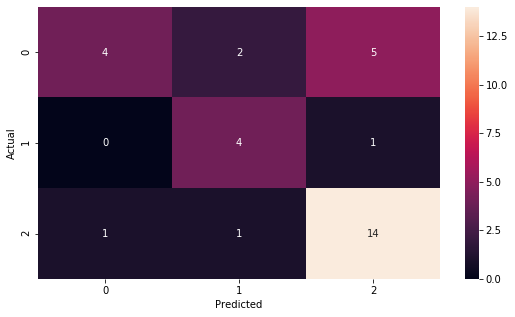

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knc=KNeighborsClassifier(n_neighbors=20,n_jobs=-1)
knc.fit(X_train,y_train)
y_pred=knc.predict(X_test)

print('-- KNeighborsClassifier report: ')
target_names = ['TN+', 'HER2+' , 'HR+']
print(classification_report(y_test, y_pred, target_names=target_names))

scores = cross_val_score(knc, X_train, y_train, cv=10, scoring='accuracy')

print("Performance Accuracy on the Testing data:", round(knc.score(X_test, y_test) *100))

#getting the predictions for X
y_pred = knc.predict(X_test)
print('Total Predictions {}'.format(len(y_pred)))

#cross validation mean score
print("10 k-fold cross validation mean score: ", scores.mean() *100)

#cross validation standard deviation score
# amount of variation or dispersion of a set of data values
print("10 k-fold cross validation standard deviation score: ", scores.std()) # *100)

# The mean score and the 95% confidence interval of the score estimates are hence given by
print("Cross Validation Confidence Interval Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

# printing classification accuracy score rounded
print("Classification accuracy: ", round(accuracy_score(y_test, y_pred, normalize=True) * 100))

# Making the Confusion Matrix
plt.figure(figsize=(9,5))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.axis('tight')
plt.show()


### Summary

In this study, we started by understanding the data we prepared it for our needs to classify breast cancer type with three algorithms K-nearest neighbors (KNN), Support Vector Machine (SVM) and random forest RF. I focused more on the random forest algorithm because I thought it will perform the best but it had the same accuracy of 81% with SVM and KNN was the least performing with 69% 

### Perspective

Understand the data a bit more with more plots and research. <br>
Make a proper comparison between the algorithm results.<br>
Refactor the code example make a test class/method, encode the data in a nicer way..<br>
Tune the algorithm parameters way much more, change the data set ratio (test/train)<br>